In [66]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [67]:
df= pd.read_csv('../input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [68]:
df.shape

(10000, 14)

In [69]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [70]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [71]:
df.info

<bound method DataFrame.info of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfP

In [72]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1, inplace=True)

In [73]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [74]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [75]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [76]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [77]:
df =pd.get_dummies(df,columns=['Gender','Geography'], drop_first=True)

In [78]:
X = df.drop(['Exited'],axis=1)
y = df['Exited']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [79]:
X_train.shape

(8000, 11)

In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [81]:
X_train_trf

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -1.09168714,
        -0.5698444 ,  1.74309049],
       [-2.30455945,  0.30102557, -1.37744033, ...,  0.91601335,
         1.75486502, -0.57369368],
       [-1.19119591, -0.94312892, -1.031415  , ..., -1.09168714,
        -0.5698444 , -0.57369368],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ...,  0.91601335,
        -0.5698444 , -0.57369368],
       [-0.62420521, -0.08179119,  1.39076231, ..., -1.09168714,
        -0.5698444 ,  1.74309049],
       [-0.28401079,  0.87525072, -1.37744033, ..., -1.09168714,
         1.75486502, -0.57369368]])

In [82]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [83]:
model = Sequential()
model.add(Dense(22, activation='sigmoid', input_dim=11))
model.add(Dense(22, activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [84]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 22)                264       
_________________________________________________________________
dense_19 (Dense)             (None, 22)                506       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 23        
Total params: 793
Trainable params: 793
Non-trainable params: 0
_________________________________________________________________


In [85]:
model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])

In [86]:
history = model.fit(X_train,y_train,batch_size=50, epochs=10, validation_split=0.2)

Epoch 1/10
128/128 [==============================] - 1s 4ms/step - loss: 0.5501 - accuracy: 0.7486 - val_loss: 0.4993 - val_accuracy: 0.7969
Epoch 2/10
128/128 [==============================] - 0s 3ms/step - loss: 0.5030 - accuracy: 0.7958 - val_loss: 0.4980 - val_accuracy: 0.7969
Epoch 3/10
128/128 [==============================] - 0s 3ms/step - loss: 0.5022 - accuracy: 0.7958 - val_loss: 0.4979 - val_accuracy: 0.7969
Epoch 4/10
128/128 [==============================] - 0s 3ms/step - loss: 0.5014 - accuracy: 0.7958 - val_loss: 0.4977 - val_accuracy: 0.7969
Epoch 5/10
128/128 [==============================] - 0s 2ms/step - loss: 0.5011 - accuracy: 0.7958 - val_loss: 0.4957 - val_accuracy: 0.7969
Epoch 6/10
128/128 [==============================] - 0s 3ms/step - loss: 0.5012 - accuracy: 0.7958 - val_loss: 0.4952 - val_accuracy: 0.7969
Epoch 7/10
128/128 [==============================] - 0s 2ms/step - loss: 0.5005 - accuracy: 0.7958 - val_loss: 0.4958 - val_accuracy: 0.7969
Epoch 

In [87]:
y_pred = model.predict(X_test)

In [88]:
y_pred

array([[0.2185381 ],
       [0.2185381 ],
       [0.2221075 ],
       ...,
       [0.2221075 ],
       [0.24273032],
       [0.2185381 ]], dtype=float32)

In [89]:
y_pred = y_pred.argmax(axis=-1)

In [90]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [91]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7975

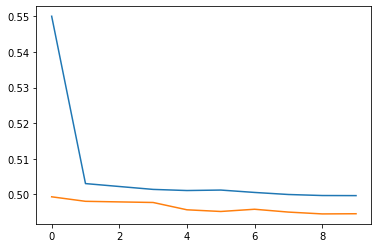

In [93]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

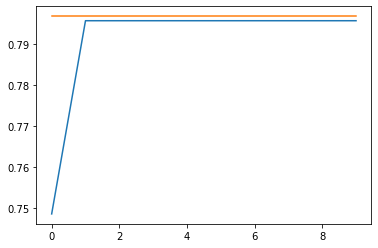

In [94]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])